In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [6]:
np.random.seed(42)

In [9]:
digits = load_digits()
data = scale(digits.data)

# print(digits)
print(data)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


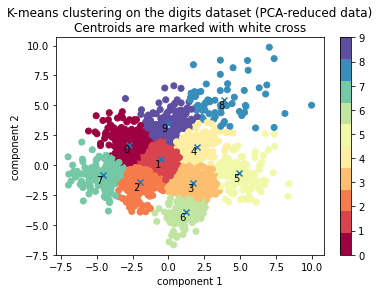

In [10]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
h = .02
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

centroids = kmeans.cluster_centers_
plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x')
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlabel('component 1')
plt.ylabel('component 2')
labels = ['{0}'.format(i) for i in range(10)]
for i in range (10):
    xy=(centroids[i, 0],centroids[i, 1])
    plt.annotate(labels[i],xy, horizontalalignment='right', verticalalignment='top')
plt.show()